# 1. Processar Dados para Extrair Padrões

In [1226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
df = pd.read_csv('../crime_segunda_area.csv')

# Análise Exploratória (EDA)

In [1227]:
display(df)

,latitude,longitude,data,hora,tipo_crime,bairro,rua,tipo_dia,ano,nome,cpf,idade,email,telefone,endereco,risco,__ERRO__,null
0,-15.811282,-47.892078,2024-09-27,00:12,furto,Asa Sul,Novo Setor 1,final_semana,2024,Ana Beatriz Pacheco,261.785.039-03,32.0,maria-helena79@example.net,(051) 2152-7711,NaN,3,ERRO_404,NaN
1,-15.819452,-47.902993,2025-04-26,18:39,vandalismo,Asa Sul,L2 Sul,final_semana,2025,Vinicius Araújo,749.168.520-01,72.0,NaN,NaN,"L2 Sul Edifício Alpha, Unidade 112",5,ERRO_404,NaN
2,-15.817717,-47.907057,2021-03-10,13:55,tráfico,Asa Sul,W3 Sul,dia_normal,2021,Clarice Gomes,607.354.891-57,19.0,NaN,+55 41 5248-9584,"W3 Sul Edifício Center, Unidade 232",4,ERRO_404,NaN
3,-15.823929,-47.895869,2022-02-17,15:21,homicídio,Asa Sul,L2 Sul,dia_normal,2022,Maria Cecília Rios,945.081.376-01,31.0,yuriaragao@example.net,+55 84 1544 1735,"L2 Sul Bloco A, Ap 750",5,ERRO_404,NaN
4,-15.821839,-47.902117,2022-05-13,22:22,homicídio,Asa Sul,L2 Sul,final_semana,2022,Sra. Maysa Gonçalves,125.867.304-53,21.0,NaN,+55 (061) 0095 3309,"L2 Sul Lote 6, Sala 285",5,ERRO_404,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-15.811532,-47.893949,2024-07-18,10:58,roubo,Asa Sul,Novo Setor 1,dia_normal,2024,Dr. Ravi Lucca Azevedo,745.802.136-53,16.0,NaN,+55 (084) 9138-1838,"Novo Setor 1 Edifício Prime, Unidade 120",3,ERRO_404,NaN
29996,-15.810827,-47.892664,2020-11-09,15:52,vandalismo,Asa Sul,Novo Setor 1,dia_normal,2020,Isabelly da Conceição,361.982.705-21,19.0,araujopietro@example.org,+55 41 3278-6800,"Novo Setor 1 Edifício Bravo, Unidade 169",3,ERRO_404,NaN
29997,-15.827207,-47.912923,2021-12-09,06:36,vandalismo,Asa Sul,Eixo L Sul,dia_normal,2021,Bernardo Souza,412.706.835-35,64.0,pedro09@example.org,+55 31 2979 6036,"Eixo L Sul Lote 39, Sala 112",2,ERRO_404,NaN
29998,-15.816173,-47.907198,2023-07-10,01:02,roubo,Asa Sul,W3 Sul,dia_normal,2023,Daniel Correia,802.164.795-76,21.0,lcunha@example.org,+55 (041) 1567 5019,"W3 Sul Lote 7, Sala 218",4,ERRO_404,NaN


### Inspeção inicial

In [1228]:
print(f"Dimensões do DataFrame\n\n{df.shape}")
print("\nHEAD\n",df.head())
print("\nDESCRIBE\n",df.describe(include="all"))

Dimensões do DataFrame

(30000, 18)

HEAD
     latitude  longitude        data   hora  tipo_crime   bairro           rua  \
0 -15.811282 -47.892078  2024-09-27  00:12       furto  Asa Sul  Novo Setor 1   
1 -15.819452 -47.902993  2025-04-26  18:39  vandalismo  Asa Sul        L2 Sul   
2 -15.817717 -47.907057  2021-03-10  13:55     tráfico  Asa Sul        W3 Sul   
3 -15.823929 -47.895869  2022-02-17  15:21   homicídio  Asa Sul        L2 Sul   
4 -15.821839 -47.902117  2022-05-13  22:22   homicídio  Asa Sul        L2 Sul   

       tipo_dia   ano                  nome             cpf  idade  \
0  final_semana  2024   Ana Beatriz Pacheco  261.785.039-03   32.0   
1  final_semana  2025       Vinicius Araújo  749.168.520-01   72.0   
2    dia_normal  2021         Clarice Gomes  607.354.891-57   19.0   
3    dia_normal  2022    Maria Cecília Rios  945.081.376-01   31.0   
4  final_semana  2022  Sra. Maysa Gonçalves  125.867.304-53   21.0   

                        email             telefon

### Verificando dados Nulos e duplicatas

In [1229]:
#Nulos
print(df.isnull().sum())
#Duplicatas
print("---------------------\n        Duplicatas")
print("Duplicatas:", df.duplicated().sum())

latitude          0
longitude         0
data              0
hora              0
tipo_crime      307
bairro            0
rua               0
tipo_dia          0
ano               0
nome            860
cpf               0
idade          2398
email          5954
telefone       2141
endereco       2709
risco             0
__ERRO__          0
null          30000
dtype: int64
---------------------
        Duplicatas
Duplicatas: 0


## Visualização de Dados

## a) Crimes por Horário


In [1230]:

# Contar crimes por hora
df['hora'] = pd.to_datetime(df['hora']).dt.hour
crimes_por_hora = df.groupby('hora').size().reset_index(name='contagem')
crimes_por_hora = crimes_por_hora.sort_values(by='contagem', ascending=False)
print("Horários com mais crimes:")
print(crimes_por_hora.head(24))

C:\Users\migue\AppData\Local\Temp\ipykernel_18096\2489483636.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['hora']).dt.hour


Horários com mais crimes:
    hora  contagem
22    22      2433
23    23      2363
0      0      2274
21    21      2255
20    20      2090
1      1      2077
19    19      1897
2      2      1821
18    18      1640
3      3      1605
17    17      1324
4      4      1289
16    16      1104
5      5      1022
6      6       825
15    15       820
14    14       587
7      7       570
13    13       447
8      8       428
9      9       307
12    12       294
10    10       270
11    11       258


### Gráfico quantidade de Crimes Por Hora

C:\Users\migue\AppData\Local\Temp\ipykernel_18096\2643618714.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimes_por_hora.index, y=crimes_por_hora.values, palette=colors)


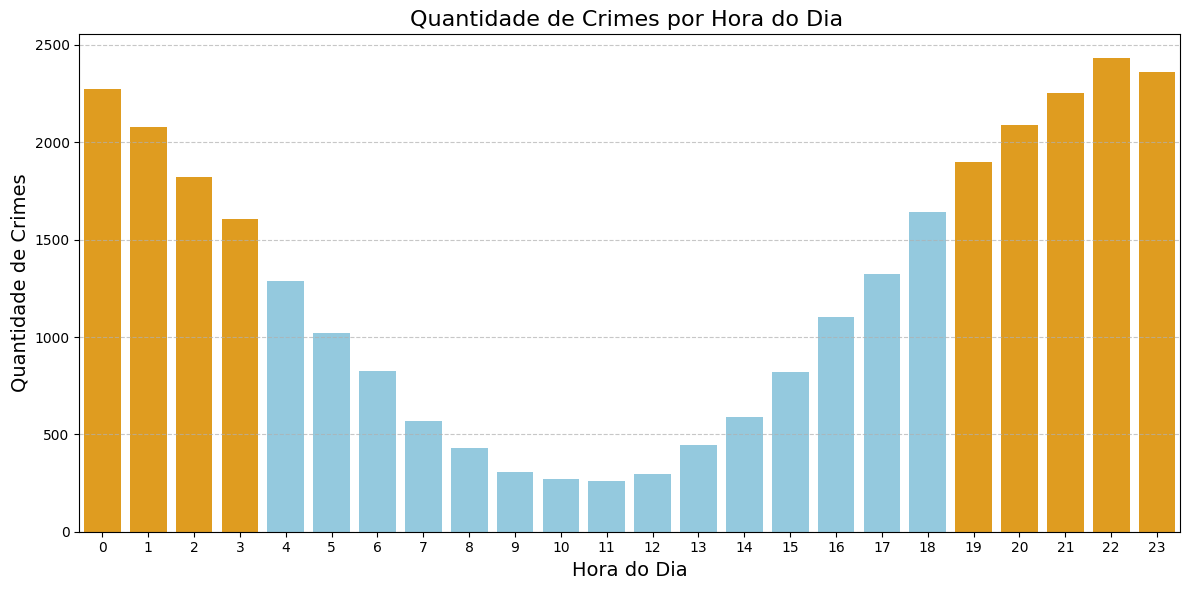

In [1231]:

# Contar quantos crimes ocorreram em cada hora
crimes_por_hora = df['hora'].value_counts().sort_index()
# Definir cores para destacar 21h–23h e 0h–2h
colors = ['orange' if h >= 19 or h < 4 else 'skyblue' for h in crimes_por_hora.index]

# Plotar com cores personalizadas
plt.figure(figsize=(12, 6))
sns.barplot(x=crimes_por_hora.index, y=crimes_por_hora.values, palette=colors)
plt.title("Quantidade de Crimes por Hora do Dia ", fontsize=16)
plt.xlabel("Hora do Dia", fontsize=14)
plt.ylabel("Quantidade de Crimes", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## b) Crimes por Localização


In [1232]:
# Contar crimes por rua
crimes_por_rua = df.groupby('rua').size().reset_index(name='contagem')
crimes_por_rua = crimes_por_rua.sort_values(by='contagem', ascending=False)
print("Ruas com mais crimes:")
print(crimes_por_rua.head(3))

Ruas com mais crimes:
            rua  contagem
2  Novo Setor 1      9859
0    Eixo L Sul      8111
3        W3 Sul      7324


### Gráfico crime por localidade

C:\Users\migue\AppData\Local\Temp\ipykernel_18096\2587393700.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contagem', y='rua', data=top_ruas, palette='viridis')


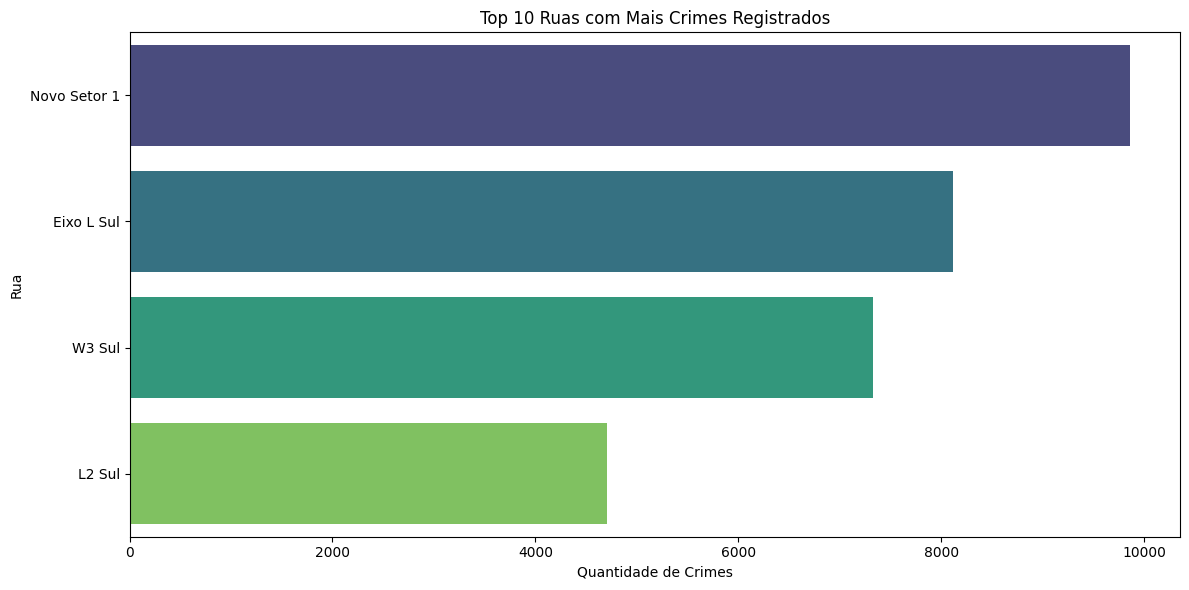

In [1233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seu código para agrupar os dados
crimes_por_rua = df.groupby('rua').size().reset_index(name='contagem')
crimes_por_rua = crimes_por_rua.sort_values(by='contagem', ascending=False)

# Mostrar top 10 ruas com mais crimes (ajuste conforme necessário)
top_ruas = crimes_por_rua.head(10)

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='contagem', y='rua', data=top_ruas, palette='viridis')

# Configurações do gráfico
plt.title('Top 10 Ruas com Mais Crimes Registrados')
plt.xlabel('Quantidade de Crimes')
plt.ylabel('Rua')
plt.tight_layout()

# Mostrar gráfico
plt.show()

##    c) Crimes por Tipo


In [1234]:
# Contar crimes por tipo
crimes_por_tipo = df.groupby('tipo_crime').size().reset_index(name='contagem')
crimes_por_tipo = crimes_por_tipo.sort_values(by='contagem', ascending=False)
print("Tipos de crime mais comuns:")
print(crimes_por_tipo.head(3))

Tipos de crime mais comuns:
   tipo_crime  contagem
1       furto      7887
3       roubo      7055
5  vandalismo      5719


### Gráfico de Tipos de Crime

C:\Users\migue\AppData\Local\Temp\ipykernel_18096\3331100647.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequencia_crimes_total, x='quantidade', y='tipo_crime', palette='viridis')



Quantidade total de crimes: 30000

Principais tipos de crimes:
    tipo_crime  quantidade  porcentagem
0        furto        7887    26.561816
1        roubo        7055    23.759809
2   vandalismo        5719    19.260432
3      tráfico        5025    16.923181
4    homicídio        2659     8.954973
5  feminicídio        1348     4.539791


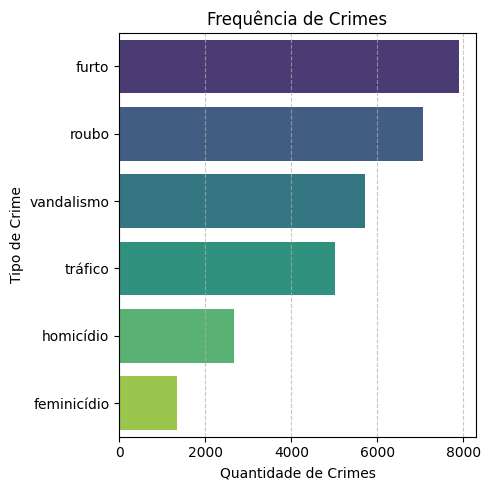

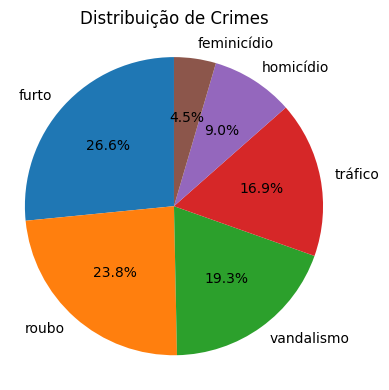

In [1235]:
# Verificar se há registros
print("\nQuantidade total de crimes:", len(df))

# Contar frequência de cada tipo de crime noturno
frequencia_crimes_total = df['tipo_crime'].value_counts().reset_index()
frequencia_crimes_total.columns = ['tipo_crime', 'quantidade']

# Calcular porcentagem
total_crimes = frequencia_crimes_total['quantidade'].sum()
frequencia_crimes_total['porcentagem'] = (frequencia_crimes_total['quantidade'] / total_crimes) * 100

# Exibir resultados
print("\nPrincipais tipos de crimes:")
print(frequencia_crimes_total)

# Gráfico de barras
plt.figure(figsize=(5, 5))
sns.barplot(data=frequencia_crimes_total, x='quantidade', y='tipo_crime', palette='viridis')
plt.title('Frequência de Crimes')
plt.xlabel('Quantidade de Crimes')
plt.ylabel('Tipo de Crime')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(frequencia_crimes_total['quantidade'], labels=frequencia_crimes_total['tipo_crime'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Crimes')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Risco por regiao com base nos tipos de crime e rua


In [1236]:
# Definir pesos por tipo de crime
pesos = {
    'feminicídio': 5,
    'homicídio': 5,
    'tráfico': 4,
    'roubo': 3,
    'furto': 2,
    'vandalismo': 1
}

# Adicionar coluna de peso
df['peso'] = df['tipo_crime'].map(pesos)

# Calcular pontuação de risco por rua
risco_por_rua = df.groupby('rua')['peso'].sum().reset_index(name='risco_total')
risco_por_rua = risco_por_rua.sort_values(by='risco_total', ascending=False)
print("Ruas com maior risco:")
print(risco_por_rua.head(3))

Ruas com maior risco:
            rua  risco_total
2  Novo Setor 1      24594.0
3        W3 Sul      21860.0
0    Eixo L Sul      20201.0


#### Identificando Horários de Risco com crimes de mais gravidade e horários


In [1237]:
# Filtrar crimes graves (ex: homicídio, tráfico)
crimes_graves = df[df['tipo_crime'].isin(['homicídio', 'tráfico'])]

# Contar crimes graves por hora
horarios_risco = crimes_graves.groupby('hora').size().reset_index(name='contagem')
horarios_risco = horarios_risco.sort_values(by='contagem', ascending=False)
print("Horários com mais crimes graves:")
print(horarios_risco.head(3))

Horários com mais crimes graves:
    hora  contagem
22    22       610
21    21       596
23    23       587


### Gráfico de crimes noturnos( entre 21h as 4)


Quantidade total de crimes: 30000
Quantidade de crimes noturnos: 20104

Principais tipos de crimes noturnos:
    tipo_crime  quantidade  porcentagem
0        furto        5341    26.831106
1        roubo        4810    24.163569
2   vandalismo        3739    18.783281
3      tráfico        3380    16.979805
4    homicídio        1720     8.640611
5  feminicídio         916     4.601628


C:\Users\migue\AppData\Local\Temp\ipykernel_18096\370515097.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequencia_crimes, x='quantidade', y='tipo_crime', palette='viridis')


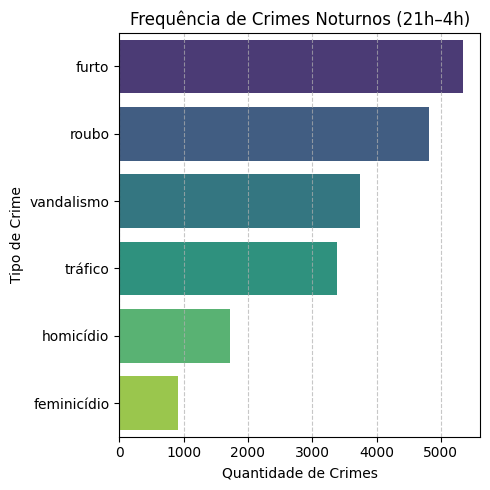

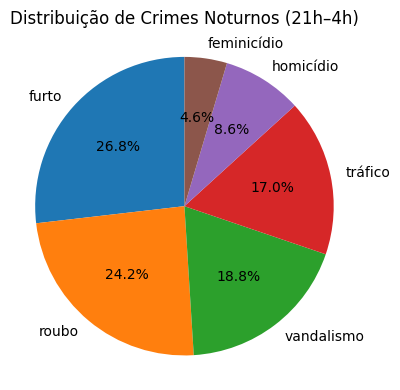

In [1238]:

# Filtrar crimes noturnos (21h–23h e 00h–5h)
crimes_noturnos = df[(df['hora'] >= 19) | (df['hora'] <= 4)]

# Verificar se há registros noturnos
print("\nQuantidade total de crimes:", len(df))
print("Quantidade de crimes noturnos:", len(crimes_noturnos))

# Contar frequência de cada tipo de crime noturno
frequencia_crimes = crimes_noturnos['tipo_crime'].value_counts().reset_index()
frequencia_crimes.columns = ['tipo_crime', 'quantidade']

# Calcular porcentagem
total_crimes_noturnos = frequencia_crimes['quantidade'].sum()
frequencia_crimes['porcentagem'] = (frequencia_crimes['quantidade'] / total_crimes_noturnos) * 100

# Exibir resultados
print("\nPrincipais tipos de crimes noturnos:")
print(frequencia_crimes)

# Gráfico de barras
plt.figure(figsize=(5, 5))
sns.barplot(data=frequencia_crimes, x='quantidade', y='tipo_crime', palette='viridis')
plt.title('Frequência de Crimes Noturnos (21h–4h)')
plt.xlabel('Quantidade de Crimes')
plt.ylabel('Tipo de Crime')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(frequencia_crimes['quantidade'], labels=frequencia_crimes['tipo_crime'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Crimes Noturnos (21h–4h)')
plt.axis('equal')  # Para manter o círculo redondo
plt.tight_layout()
plt.show()

## Vitimas Por Idade

### Gráficos de vitimas de crime por idade 

C:\Users\migue\AppData\Local\Temp\ipykernel_18096\640978022.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=frequencia_idades, x='quantidade', y='faixa_etaria', palette='viridis')


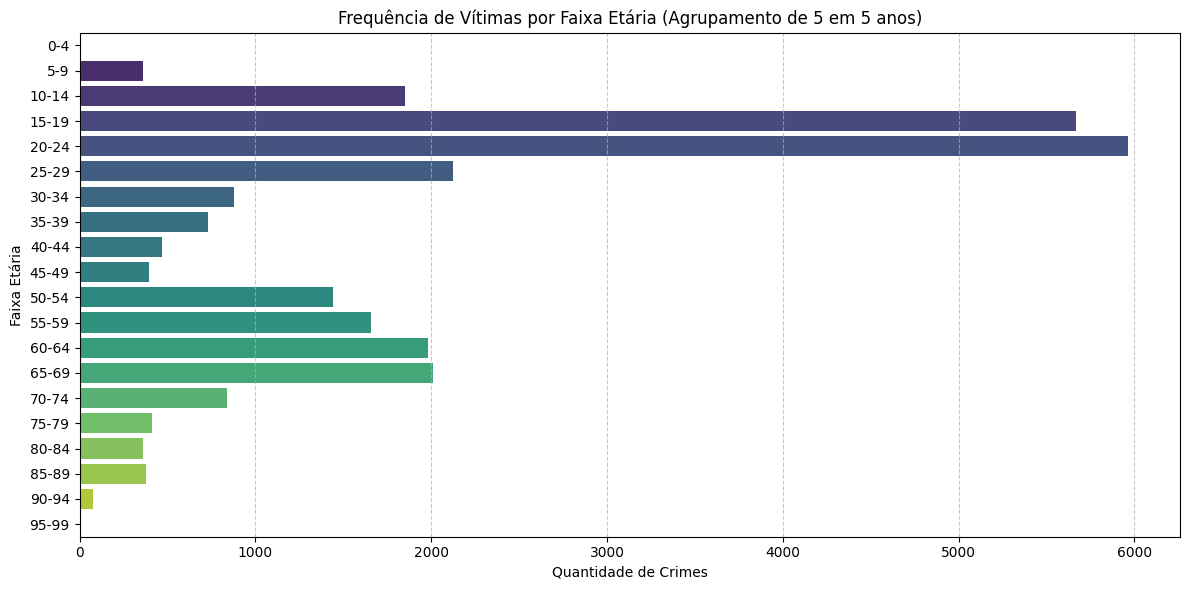

In [1239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Limpar NaN e converter idade para inteiro
df_idade = df['idade'].dropna().astype(int)

# Definir intervalos de 5 anos
bins = range(0, 101, 5)  # 0-5, 5-10, 10-15, ..., 95-100
labels = [f"{i}-{i+4}" for i in bins[:-1]]

# Agrupar idades
binned_ages = pd.cut(df_idade, bins=bins, labels=labels, right=False)

# Contar frequência por grupo de idade
frequencia_idades = binned_ages.value_counts().sort_index()
frequencia_idades = frequencia_idades.reset_index()
frequencia_idades.columns = ['faixa_etaria', 'quantidade']

# Calcular porcentagem
total = frequencia_idades['quantidade'].sum()
frequencia_idades['porcentagem'] = (frequencia_idades['quantidade'] / total) * 100

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=frequencia_idades, x='quantidade', y='faixa_etaria', palette='viridis')
plt.title("Frequência de Vítimas por Faixa Etária (Agrupamento de 5 em 5 anos)")
plt.xlabel("Quantidade de Crimes")
plt.ylabel("Faixa Etária")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Mapa de Correlação

In [1240]:
from scipy.stats import f_oneway
import numpy as np

def correlation_ratio(categories, measurements):
    # Garantir que measurements seja numérico
    measurements = pd.to_numeric(measurements, errors='coerce')
    
    # Remover valores nulos
    valid_idx = ~np.isnan(measurements)
    categories = categories[valid_idx]
    measurements = measurements[valid_idx]
    
    # Agrupar idades por tipo de crime
    groups = [measurements[categories == c] for c in np.unique(categories)]
    
    # Verificar se todos os grupos têm pelo menos uma amostra
    groups = [g for g in groups if len(g) > 0]
    
    if len(groups) < 2:
        return 0  # Não é possível calcular com apenas um grupo
    
    # Calcular F e variâncias
    f, _ = f_oneway(*groups)
    SS_total = np.sum((measurements - np.mean(measurements))**2)
    SS_between = np.sum([len(g) * (np.mean(g) - np.mean(measurements))**2 for g in groups])
    
    return SS_between / SS_total
# Garantir que idade seja numérica
df['idade'] = pd.to_numeric(df['idade'], errors='coerce')

# Alinhar categorias e medidas
df_clean = df[['tipo_crime', 'idade']].dropna()
categorias = df_clean['tipo_crime']
idades = df_clean['idade']

# Calcular correlation ratio
print("Correlation Ratio (idade vs tipo_crime):", correlation_ratio(categorias, idades))

Correlation Ratio (idade vs tipo_crime): 0.10593487092272212


In [1241]:
from scipy.stats import chi2_contingency

# Calcular Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

print("Cramér’s V (tipo_crime vs rua):", cramers_v(df['tipo_crime'], df['rua']))

Cramér’s V (tipo_crime vs rua): 0.24724639199104514


In [1242]:
# Função para calcular correlação entre qualquer par de colunas
def mixed_correlation(df):
    cols = df.columns
    result = pd.DataFrame(index=cols, columns=cols)
    
    for col1 in cols:
        for col2 in cols:
            if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):
                # Correlação de Pearson
                result.loc[col1, col2] = df[[col1, col2]].corr().iloc[0, 1]
            elif (pd.api.types.is_categorical_dtype(df[col1]) or df[col1].dtype == 'object') and (pd.api.types.is_numeric_dtype(df[col2])):
                # Correlation Ratio (categórico vs numérico)
                result.loc[col1, col2] = correlation_ratio(df[col1], df[col2])
            elif (pd.api.types.is_numeric_dtype(df[col1])) and (pd.api.types.is_categorical_dtype(df[col2]) or df[col2].dtype == 'object'):
                # Correlation Ratio (numérico vs categórico)
                result.loc[col1, col2] = correlation_ratio(df[col2], df[col1])
            else:
                # Cramér’s V (categórico vs categórico)
                result.loc[col1, col2] = cramers_v(df[col1], df[col2])
    return result.astype(float)

C:\Users\migue\AppData\Local\Temp\ipykernel_18096\3080772362.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif (pd.api.types.is_categorical_dtype(df[col1]) or df[col1].dtype == 'object') and (pd.api.types.is_numeric_dtype(df[col2])):
C:\Users\migue\AppData\Local\Temp\ipykernel_18096\3080772362.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif (pd.api.types.is_numeric_dtype(df[col1])) and (pd.api.types.is_categorical_dtype(df[col2]) or df[col2].dtype == 'object'):
C:\Users\migue\AppData\Local\Temp\ipykernel_18096\3080772362.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif (pd.api.types.is_categorical_dtype(df[col1]) or df[col1].dtype == 'object') and (pd.api.

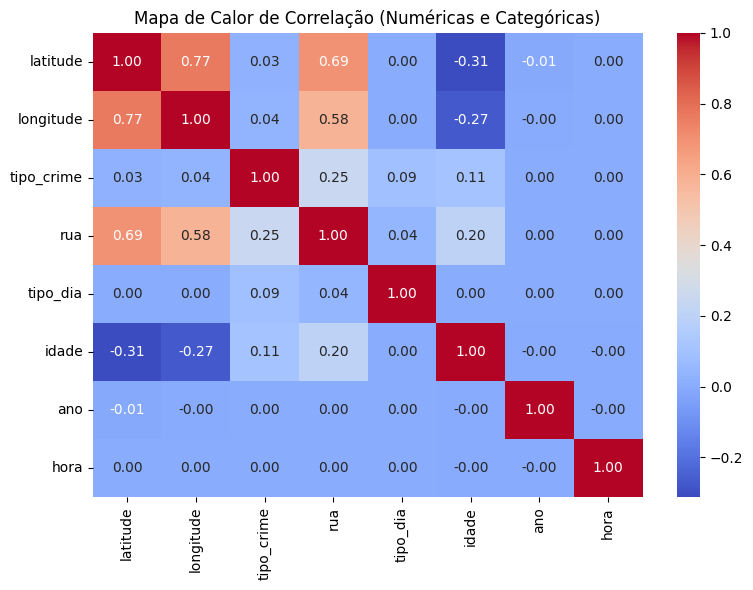

In [1243]:
# Limpar dados
df_clean = df[["latitude","longitude",'tipo_crime', 'rua', 'tipo_dia', 'idade', 'ano',"hora"]].dropna()

# Calcular correlação mista
mixed_corr = mixed_correlation(df_clean)

# Plotar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mixed_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Calor de Correlação (Numéricas e Categóricas)")
plt.tight_layout()
plt.show()

## Mapas Folium Para Visualizar o Mapa de calor de crimes por região


In [1244]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster


# Definir peso por tipo de crime
peso_crime = {
    'furto': 2,
    'roubo': 3,
    'vandalismo': 1,
    'tráfico': 4,
    'homicídio': 5,
    'feminicídio': 5
}
df['peso'] = df['tipo_crime'].map(peso_crime)

# Risco por rua
risco_por_rua = df.groupby('rua').agg(
    total_crimes=('tipo_crime', 'count'),
    risco_total=('peso', 'sum')
).reset_index()
risco_por_rua['risco_medio'] = risco_por_rua['risco_total'] / risco_por_rua['total_crimes']

# Mapa interativo com marcadores e heatmap
mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=14, tiles='CartoDB positron')

# Cluster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)
for _, row in df.sample(n=500).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['rua']} - {row['tipo_crime']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Heatmap (usar amostra menor para performance)
heat_data = [[row['latitude'], row['longitude']] for _, row in df.sample(n=500).iterrows()]
HeatMap(heat_data, radius=15, blur=20, max_zoom=16).add_to(mapa)

# Marcadores dos setores com mais risco
risco_top = risco_por_rua.sort_values(by='risco_total', ascending=False).head(5)
for _, row in risco_top.iterrows():
    # Filtrar coordenadas médias da rua
    lat_media = df[df['rua'] == row['rua']]['latitude'].mean()
    lon_media = df[df['rua'] == row['rua']]['longitude'].mean()
    
    # Validar coordenadas antes de adicionar ao mapa
    if pd.notna(lat_media) and pd.notna(lon_media):
        folium.Marker(
            location=[lat_media, lon_media],
            popup=f"{row['rua']} (Risco: {row['risco_total']})",
            icon=folium.Icon(color='darkred', icon='warning-sign')
        ).add_to(mapa)

# Salvar o mapa
mapa.save('mapa_calor.html')
print("✅ Mapa salvo como 'mapa_calor.html'")

✅ Mapa salvo como 'mapa_calor.html'


### Mapa de Calor incidência de crimes por hora

In [1245]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import DBSCAN

# Carregar os dados
df = pd.read_csv('../crime_segunda_area.csv')

# Converter hora para numérica (se ainda não estiver)
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M', errors='coerce').dt.hour

# Loop por cada hora do dia (0–23)
for hora in range(24):
    # Filtrar dados para a hora atual
    df_hora = df[df['hora'] == hora]
    
    # Agrupar pontos próximos usando DBSCAN (epsilon=0.005 graus ≈ 500 metros)
    coords = df_hora[['latitude', 'longitude']].values
    dbscan = DBSCAN(eps=0.005, min_samples=5).fit(coords)
    labels = dbscan.labels_
    
    # Calcular centroides dos clusters
    unique_labels = set(labels)
    clusters = []
    for label in unique_labels:
        if label == -1:
            continue  # Ignorar outliers
        cluster = coords[labels == label]
        centroid = (np.mean(cluster[:, 0]), np.mean(cluster[:, 1]))
        count = len(cluster)
        clusters.append({'centroid': centroid, 'count': count})
    
    # Selecionar os 3 clusters com mais crimes
    top_clusters = sorted(clusters, key=lambda x: -x['count'])[:3]
    
    # Criar mapa base
    mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=14, tiles='CartoDB positron')
    
    # Cluster de marcadores (amostra de 500 registros para performance)
    marker_cluster = MarkerCluster().add_to(mapa)
    for _, row in df_hora.sample(n=100).iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"{row['rua']} - {row['tipo_crime']}",
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(marker_cluster)
    
    # Heatmap com ponderação pelo 'peso' do crime (opcional)
    heat_data = [[row['latitude'], row['longitude']] for _, row in df_hora.iterrows()]
    HeatMap(heat_data, radius=15, blur=20, max_zoom=16).add_to(mapa)
    
    # Adicionar marcadores dos 3 clusters com maior incidência
    colors = ['darkred', 'orange', 'blue']
    for i, cluster in enumerate(top_clusters):
        lat, lon = cluster['centroid']
        count = cluster['count']
        
        folium.CircleMarker(
            location=[lat, lon],
            radius=10,
            color=colors[i % 3],
            fill=True,
            fill_color=colors[i % 3],
            popup=f"Máximo de {count} crimes nesse ponto"
        ).add_to(mapa)
    
    # Adicionar legenda da hora
    folium.map.LayerControl('bottomleft').add_to(mapa)
    folium.Marker(
        location=[-15.7942, -47.8825],
        icon=folium.DivIcon(html=f'<div style="font-weight: bold; color: red;">{hora}h</div>')
    ).add_to(mapa)
    
    # Salvar mapa da hora atual
    filename = f'mapa_calor_{hora:02d}.html'
    mapa.save(filename)

    print(f"✅ Mapa da {hora}h salvo como '{filename}'")

✅ Mapa da 0h salvo como 'mapa_calor_00.html'
✅ Mapa da 1h salvo como 'mapa_calor_01.html'
✅ Mapa da 2h salvo como 'mapa_calor_02.html'
✅ Mapa da 3h salvo como 'mapa_calor_03.html'
✅ Mapa da 4h salvo como 'mapa_calor_04.html'
✅ Mapa da 5h salvo como 'mapa_calor_05.html'
✅ Mapa da 6h salvo como 'mapa_calor_06.html'
✅ Mapa da 7h salvo como 'mapa_calor_07.html'
✅ Mapa da 8h salvo como 'mapa_calor_08.html'
✅ Mapa da 9h salvo como 'mapa_calor_09.html'
✅ Mapa da 10h salvo como 'mapa_calor_10.html'
✅ Mapa da 11h salvo como 'mapa_calor_11.html'
✅ Mapa da 12h salvo como 'mapa_calor_12.html'
✅ Mapa da 13h salvo como 'mapa_calor_13.html'
✅ Mapa da 14h salvo como 'mapa_calor_14.html'
✅ Mapa da 15h salvo como 'mapa_calor_15.html'
✅ Mapa da 16h salvo como 'mapa_calor_16.html'
✅ Mapa da 17h salvo como 'mapa_calor_17.html'
✅ Mapa da 18h salvo como 'mapa_calor_18.html'
✅ Mapa da 19h salvo como 'mapa_calor_19.html'
✅ Mapa da 20h salvo como 'mapa_calor_20.html'
✅ Mapa da 21h salvo como 'mapa_calor_21.html

### Mapa de Calor Atualizado

In [1246]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster


# Definir peso por tipo de crime
peso_crime = {
    'furto': 2,
    'roubo': 3,
    'vandalismo': 1,
    'tráfico': 4,
    'homicídio': 5,
    'feminicídio': 5
}
df['peso'] = df['tipo_crime'].map(peso_crime)

# Risco por rua
risco_por_rua = df.groupby('rua').agg(
    total_crimes=('tipo_crime', 'count'),
    risco_total=('peso', 'sum')
).reset_index()
risco_por_rua['risco_medio'] = risco_por_rua['risco_total'] / risco_por_rua['total_crimes']

# Mapa interativo com marcadores e heatmap
mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=14, tiles='CartoDB positron')

# Cluster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)
for _, row in df.sample(n=500).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['rua']} - {row['tipo_crime']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Heatmap (usar amostra menor para performance)
heat_data = [[row['latitude'], row['longitude']] for _, row in df.sample(n=500).iterrows()]
HeatMap(heat_data, radius=15, blur=20, max_zoom=16).add_to(mapa)

# Marcadores dos setores com mais risco
risco_top = risco_por_rua.sort_values(by='risco_total', ascending=False).head(5)
for _, row in risco_top.iterrows():
    # Filtrar coordenadas médias da rua
    lat_media = df[df['rua'] == row['rua']]['latitude'].mean()
    lon_media = df[df['rua'] == row['rua']]['longitude'].mean()
    
    # Validar coordenadas antes de adicionar ao mapa
    if pd.notna(lat_media) and pd.notna(lon_media):
        folium.Marker(
            location=[lat_media, lon_media],
            popup=f"{row['rua']} (Risco: {row['risco_total']})",
            icon=folium.Icon(color='darkred', icon='warning-sign')
        ).add_to(mapa)

# Salvar o mapa
mapa.save('mapa_calor.html')
print("✅ Mapa salvo como 'mapa_calor.html'")

✅ Mapa salvo como 'mapa_calor.html'


5. Exibir Rotas no Waze ou Google Maps


In [1247]:
# Exemplo de URL para abrir no Waze
lat_destino = -15.7932
lon_destino = -47.8815
url_waze = f"https://waze.com/ul?ll={lat_destino}%2C{lon_destino}&navigate=yes"
print("🔗 Rota no Waze:", url_waze)

🔗 Rota no Waze: https://waze.com/ul?ll=-15.7932%2C-47.8815&navigate=yes


## Insights

--> Há dados nulos que precisam ser tratados

--> foi tratado os valores de hora que eram string para numérico

--> necessário tratar vários valores strings para que a IA seja eficaz

--> foi observado padrões pela análise exploratória, a principal correlação é Lat Long e tipo de crime

--> Horário influencia na quantidade de crime e tipo de crime

--> uma área é a mais perigosa, na quadra 108 Sul

--> A idade que mais sofreu crime foi de 14 anos aos 23 anos 

# Pré Processamento

### Retirando colunas de Erro e Null

In [1248]:
df = pd.read_csv('../crime_segunda_area.csv')
df = df.drop(columns=["__ERRO__", "null"])
print(df)

        latitude  longitude        data   hora  tipo_crime   bairro  \
0     -15.811282 -47.892078  2024-09-27  00:12       furto  Asa Sul   
1     -15.819452 -47.902993  2025-04-26  18:39  vandalismo  Asa Sul   
2     -15.817717 -47.907057  2021-03-10  13:55     tráfico  Asa Sul   
3     -15.823929 -47.895869  2022-02-17  15:21   homicídio  Asa Sul   
4     -15.821839 -47.902117  2022-05-13  22:22   homicídio  Asa Sul   
...          ...        ...         ...    ...         ...      ...   
29995 -15.811532 -47.893949  2024-07-18  10:58       roubo  Asa Sul   
29996 -15.810827 -47.892664  2020-11-09  15:52  vandalismo  Asa Sul   
29997 -15.827207 -47.912923  2021-12-09  06:36  vandalismo  Asa Sul   
29998 -15.816173 -47.907198  2023-07-10  01:02       roubo  Asa Sul   
29999 -15.818048 -47.900066  2021-02-01  16:45       furto  Asa Sul   

                rua      tipo_dia   ano                    nome  \
0      Novo Setor 1  final_semana  2024     Ana Beatriz Pacheco   
1            

### Tratamento de Valores Nulos

In [1249]:
print(df.isnull().sum())
df['hora'] = pd.to_datetime(df['hora']).dt.hour
# Tratamento para Tipo de crime, corresponde a ~1% de valores nulos, preencher com a moda\
df['tipo_crime'] = df['tipo_crime'].fillna(df['tipo_crime'].mode()[0])
# Nome é um dado que não é necessário para a inteligência Artificial 
#Idade Irá ser preenchida com a Mediana
df['idade'] = df['idade'].fillna(df['idade'].mode()[0])
# email e telefone nao é uma informação importante para nós
#o endereço em si não é tão importante pois temos os dados de long lat,
#é possivel tratar indentificando qual o endereço mas a princípio não é o principal
print("---------------------------------\n     Dados Após o Tratamento\n")
print(df.isnull().sum())

latitude         0
longitude        0
data             0
hora             0
tipo_crime     307
bairro           0
rua              0
tipo_dia         0
ano              0
nome           860
cpf              0
idade         2398
email         5954
telefone      2141
endereco      2709
risco            0
dtype: int64


C:\Users\migue\AppData\Local\Temp\ipykernel_18096\1971805132.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['hora']).dt.hour


---------------------------------
     Dados Após o Tratamento

latitude         0
longitude        0
data             0
hora             0
tipo_crime       0
bairro           0
rua              0
tipo_dia         0
ano              0
nome           860
cpf              0
idade            0
email         5954
telefone      2141
endereco      2709
risco            0
dtype: int64


# Modelo de Regressão

In [1250]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Definir variáveis categóricas e numéricas
categorical_features = ['tipo_crime', 'tipo_dia']
numeric_features = ['hora', 'idade', 'risco']
# Codificação One-Hot para variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [1251]:
X = df[['hora', 'idade', 'risco', 'tipo_crime', 'tipo_dia']]
y = df[['latitude', 'longitude']]
# Aplicar pré-processamento
X_preprocessed = preprocessor.fit_transform(X)

In [1252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42
)

In [1253]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Treinar modelo com hiperparâmetros otimizados
model = RandomForestRegressor(
    n_estimators=287,
    max_depth=10,
    min_samples_split=9,
    min_samples_leaf=1,
    random_state=42
)
model.fit(X_train, y_train)

# Prever
preds = model.predict(X_test)

# Avaliação
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"🎯 MSE: {mse:.6f}")
print(f"📍 MAE: {mae:.6f}")
print(f"📊 R²*(Acuracia): {r2:.4f}")

🎯 MSE: 0.000034
📍 MAE: 0.004640
📊 R²*(Acuracia): 0.6312


In [ ]:
import pandas as pd

# Criar DataFrame com verdadeiros e preditos
df_resultados = pd.DataFrame({
    'real_lat': y_test.iloc[:, 0],  # Latitude real
    'real_lon': y_test.iloc[:, 1],  # Longitude real
    'pred_lat': preds[:, 0],       # Latitude predita
    'pred_lon': preds[:, 1]        # Longitude predita
})

# Salvar como CSV
df_resultados.to_csv('previsoes_vs_reais.csv', index=False)
print("✅ Arquivo 'previsoes_vs_reais.csv' criado com sucesso!")

### XGBoost

In [1254]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Treinar modelo com XGBoost
model_xgb = XGBRegressor(
    n_estimators=289,
    max_depth=3,
    learning_rate=0.0971,
    subsample=0.8934,
    colsample_bytree=0.9926,
    random_state=42
)

# Validação cruzada (5 folds)
cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()

# Treinar modelo completo no conjunto de treino
model_xgb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
preds = model_xgb.predict(X_test)

# Calcular métricas no conjunto de teste
mse_test = mean_squared_error(y_test, preds)
mae_test = mean_absolute_error(y_test, preds)
r2_test = r2_score(y_test, preds)

# Exibir resultados
print(f"📉 Média do MSE com Cross-Validation (treino): {mse_cv:.6f}")
print(f"🎯 MSE (teste): {mse_test:.6f}")
print(f"📍 MAE (teste): {mae_test:.6f}")
print(f"📊 R² (Acurácia): {r2_test:.4f}")

# Criar DataFrame com valores reais vs preditos
df_resultados = pd.DataFrame({
    'real_lat': y_test.iloc[:, 0],  # Latitude real
    'real_lon': y_test.iloc[:, 1],  # Longitude real
    'pred_lat': preds[:, 0],        # Latitude predita
    'pred_lon': preds[:, 1]         # Longitude predita
})

# Salvar em CSV
df_resultados.to_csv('previsoes_xgb.csv', index=False)
print("✅ Arquivo 'previsoes_xgb.csv' criado com sucesso!")

📉 Média do MSE com Cross-Validation (treino): 0.000033
🎯 MSE (teste): 0.000034
📍 MAE (teste): 0.004642
📊 R² (Acurácia): 0.6314
✅ Arquivo 'previsoes_xgb.csv' criado com sucesso!


#### Teste de Hiperparametro

In [1255]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# # Espaço de hiperparâmetros para busca
# param_dist = {
#     'n_estimators': randint(100, 500),
#     'max_depth': randint(3, 15),
#     'learning_rate': uniform(0.01, 0.3),
#     'subsample': uniform(0.6, 1.0),
#     'colsample_bytree': uniform(0.6, 1.0)
# }

# # Busca aleatória com validação cruzada
# search_xgb = RandomizedSearchCV(
#     estimator=XGBRegressor(random_state=42),
#     param_distributions=param_dist,
#     n_iter=50,  # Número de combinações testadas
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     verbose=1
# )

# # Treinar com busca de hiperparâmetros
# search_xgb.fit(X_train, y_train)

# # Melhores parâmetros
# print("🏆 Melhores Hiperparâmetros:", search_xgb.best_params_)

# # Avaliação no conjunto de teste
# preds_xgb = search_xgb.predict(X_test)
# print(f"🎯 MSE: {mean_squared_error(y_test, preds_xgb):.6f}")
# print(f"📍 MAE: {mean_absolute_error(y_test, preds_xgb):.6f}")
# print(f"📊 R²: {r2_score(y_test, preds_xgb):.4f}")

In [1257]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Treinar modelo para latitude
model_lat = GradientBoostingRegressor(random_state=42)
model_lat.fit(X_train, y_train['latitude'])

# Treinar modelo para longitude
model_lon = GradientBoostingRegressor(random_state=42)
model_lon.fit(X_train, y_train['longitude'])

# Prever
preds_lat = model_lat.predict(X_test)
preds_lon = model_lon.predict(X_test)

# Avaliação
print(f"🎯 MSE Latitude: {mean_squared_error(y_test['latitude'], preds_lat):.6f}")
print(f"🎯 MSE Longitude: {mean_squared_error(y_test['longitude'], preds_lon):.6f}")
print(f"📍 MAE Latitude: {mean_absolute_error(y_test['latitude'], preds_lat):.6f}")
print(f"📍 MAE Longitude: {mean_absolute_error(y_test['longitude'], preds_lon):.6f}")
print(f"📊 R² Latitude: {r2_score(y_test['latitude'], preds_lat)}")
print(f"📊 R² Longitude: {r2_score(y_test['longitude'], preds_lon)}")
print("🎯 Acurácia:", model.score(X_test, y_test))


🎯 MSE Latitude: 0.000022
🎯 MSE Longitude: 0.000045
📍 MAE Latitude: 0.003823
📍 MAE Longitude: 0.005447
📊 R² Latitude: 0.6925005125228776
📊 R² Longitude: 0.5735330916369585
🎯 Acurácia: 0.6311633968091326


In [1258]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular erro em metros
def calcular_erro_metros(lat1, lon1, lat2, lon2):
    R = 6371e3  # Raio da Terra em metros
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    a = np.sin((lat2 - lat1)/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1)/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Aplicar função no DataFrame
df_resultados['distancia_metros'] = calcular_erro_metros(
    df_resultados['real_lat'], df_resultados['real_lon'],
    df_resultados['pred_lat'], df_resultados['pred_lon']
)

# Mostrar métricas de erro
print(f"📏 Erro médio: {df_resultados['distancia_metros'].mean():.2f} m")
print(f"📏 Erro máximo: {df_resultados['distancia_metros'].max():.2f} m")

📏 Erro médio: 778.99 m
📏 Erro máximo: 2237.37 m


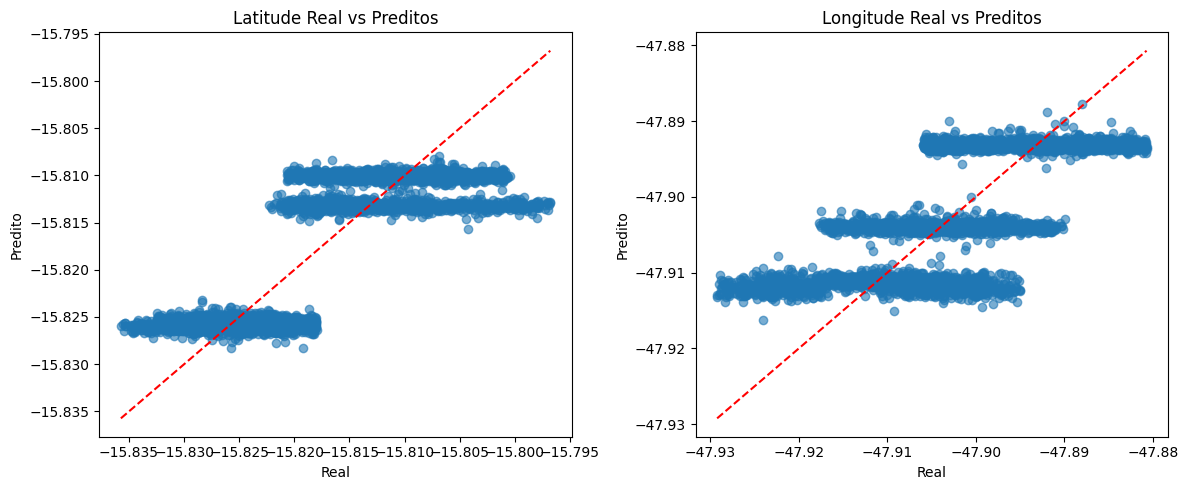

In [1259]:
plt.figure(figsize=(12, 5))

# Erro na latitude
plt.subplot(1, 2, 1)
plt.scatter(df_resultados['real_lat'], df_resultados['pred_lat'], alpha=0.6)
plt.plot([df_resultados['real_lat'].min(), df_resultados['real_lat'].max()], 
         [df_resultados['real_lat'].min(), df_resultados['real_lat'].max()], 'r--')
plt.title("Latitude Real vs Preditos")
plt.xlabel("Real")
plt.ylabel("Predito")

# Erro na longitude
plt.subplot(1, 2, 2)
plt.scatter(df_resultados['real_lon'], df_resultados['pred_lon'], alpha=0.6)
plt.plot([df_resultados['real_lon'].min(), df_resultados['real_lon'].max()], 
         [df_resultados['real_lon'].min(), df_resultados['real_lon'].max()], 'r--')
plt.title("Longitude Real vs Preditos")
plt.xlabel("Real")
plt.ylabel("Predito")

plt.tight_layout()
plt.show()

In [1260]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform
# from sklearn.ensemble import RandomForestRegressor    

# # Definir espaço de busca
# param_dist = {
#     'n_estimators': randint(50, 300),
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 4)
# }

# # Busca aleatória
# search = RandomizedSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_distributions=param_dist,
#     n_iter=30,  # Quantos conjuntos de hiperparâmetros testar
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=1,
#     n_jobs=-1
# )

# search.fit(X_train, y_train)

# # Melhores parâmetros
# print("🧠 Melhores Hiperparâmetros:", search.best_params_)

In [1261]:
import numpy as np

# Calcular erro em metros (aproximado)
def calcular_erro_metros(lat1, lon1, lat2, lon2):
    R = 6371e3  # Raio da Terra em metros
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    a = np.sin((lat2 - lat1)/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1)/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

df_erro = pd.DataFrame({
    'real_lat': y_test['latitude'],
    'real_lon': y_test['longitude'],
    'pred_lat': preds[:, 0],
    'pred_lon': preds[:, 1]
})

df_erro['distancia_metros'] = calcular_erro_metros(
    df_erro['real_lat'], df_erro['real_lon'],
    df_erro['pred_lat'], df_erro['pred_lon']
)

print(f"📏 Erro médio: {df_erro['distancia_metros'].mean():.2f} m")
print(f"📏 Erro máximo: {df_erro['distancia_metros'].max():.2f} m")

📏 Erro médio: 778.99 m
📏 Erro máximo: 2237.37 m


## Codificação das Variáveis Categóricas
- Há variáveis categóricas (tipo_crime, rua, bairro, tipo_dia), é necessário convertê-las em números para que modelos de IA possam entendê-las

In [1262]:
# Converter para categorias numéricas
df['tipo_crime_num'] = pd.factorize(df['tipo_crime'])[0]
df['rua_num'] = pd.factorize(df['rua'])[0]

### one-hot encoding para variáveis com poucas categorias

In [1263]:
# df = pd.get_dummies(df, columns=['tipo_dia'], drop_first=True)
# print(f"O tamanho do Data Frame depois de get_dummies e One-hot encoding:{df.shape}")

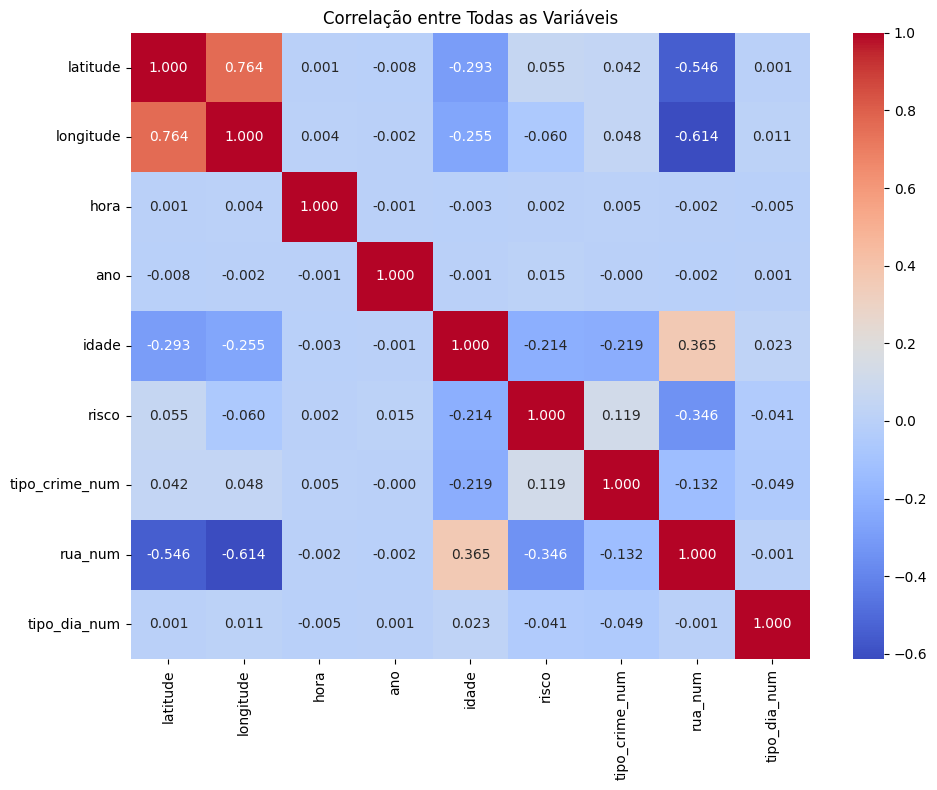

In [1264]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Garantir que colunas numéricas estejam corretas
# df['hora'] = pd.to_datetime(df['hora'], format='%H:%M', errors='coerce').dt.hour  # Converter hora para número
df['ano'] = df['ano'].astype(int)

# Codificar variáveis categóricas para numéricas
df['rua_num'] = pd.factorize(df['rua'])[0]  # W3 Sul = 0, L2 Sul = 1, etc.
df['tipo_dia_num'] = pd.factorize(df['tipo_dia'])[0]  # dia_normal = 0, final_semana = 1, feriado = 2
df['bairro_num'] = pd.factorize(df['bairro'])[0]  # Asa Sul = 0 (único bairro no dataset)

# Colunas para análise de correlação
colunas_correlacao = [
    'latitude', 'longitude', 'hora', 'ano', 'idade', 'risco', 
    'tipo_crime_num', 'rua_num', 'tipo_dia_num'
]

# Calcular correlação
corr = df[colunas_correlacao].corr()

# Plotar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.3f')
plt.title("Correlação entre Todas as Variáveis")
plt.tight_layout()
plt.show()

### Predicao de rua com base em hora, idade e risco

In [1265]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features e target
X = df[['hora', 'idade', 'risco']]
y = df['rua_num']

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
model = RandomForestClassifier(n_estimators=287)
model.fit(X_train, y_train)

# Avaliar
preds = model.predict(X_test)
print("🎯 Acurácia do modelo:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

🎯 Acurácia do modelo: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2024
           1       1.00      1.00      1.00       979
           2       1.00      1.00      1.00      1402
           3       1.00      1.00      1.00      1595

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [1266]:
import folium

mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=13)
for _, row in df.iterrows():
    cor = 'red' if row['tipo_crime'] in ['tráfico', 'homicídio'] else 'blue'
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=row['tipo_crime'],
        icon=folium.Icon(color=cor)
    ).add_to(mapa)

mapa.save('Hot-Plot.html')
print("✅ Mapa salvo como Hot-Plot(prediçao x realidade)'.html'")

✅ Mapa salvo como Hot-Plot(prediçao x realidade)'.html'
